In [ ]:
import pricing_ai
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
pd.set_option('display.max_rows',200)

#### **データ：価格の変動を持ったstockidデータ**

In [2]:
%%time
df = pricing_ai.get_data('sql/stock_cars.sql')

CPU times: user 1min 14s, sys: 38.7 s, total: 1min 53s
Wall time: 7min 40s


#### **前処理：値段未設定を削除**

In [3]:
pricing_ai.print_shape(df)
df = df[df.price != 999999999]
pricing_ai.print_shape(df)

(59161303, 3)
(58740983, 3)


#### **データ：初回と成約**

In [4]:
first_pub = pricing_ai.get_preprocessing_data(sql_path='sql/first_pub.sql',col='min_date')
contract = pricing_ai.get_preprocessing_data(sql_path='sql/contract.sql',col='delete_date')

#### **データ：初回の日付と成約の日付作成**

In [5]:
start_day_dict = first_pub.set_index('stock_id')['min_date'].to_dict()
end_day_dict = contract.set_index('stock_id')['delete_date'].to_dict()

#### **前処理：初回と成約の日付を結合**

In [6]:
df['end_day']=df.stock_id.map(end_day_dict)
df['start_day']=df.stock_id.map(start_day_dict)

In [7]:
del start_day_dict, end_day_dict, first_pub, contract

In [10]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['stock_id', 'date'])

df['min_price'] = df.groupby('stock_id')['price'].transform('min')
df['max_price'] = df.groupby('stock_id')['price'].transform('max')

df['diff_price'] = df['max_price'] - df['min_price']

In [11]:
pricing_ai.print_shape(df)
df = df.dropna(subset=['start_day'])
pricing_ai.print_shape(df)

(58740983, 8)
(47388779, 8)


In [12]:
df_copy = df.copy()

In [15]:
df_copy2 = df.copy()

#### 可視化：初回掲載から成約までで価格の下落があったもの

<AxesSubplot:ylabel='Frequency'>

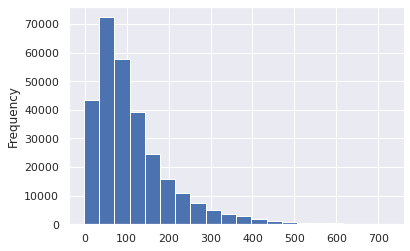

In [13]:
df_copy = df_copy[df_copy.diff_price != 0].drop_duplicates(subset=['stock_id'])
df_copy['keisai_day'] = df_copy['end_day']-df_copy['start_day']
df_copy['keisai_day'] = df_copy.keisai_day.astype('timedelta64[D]').astype(int)
df_copy['keisai_day'].plot.hist(bins=20)

In [14]:
df_copy.keisai_day.median(), df_copy.keisai_day.mean()

(87.0, 114.11965797195619)

#### 可視化：初回掲載から成約まで価格の下落がないもの 

<AxesSubplot:ylabel='Frequency'>

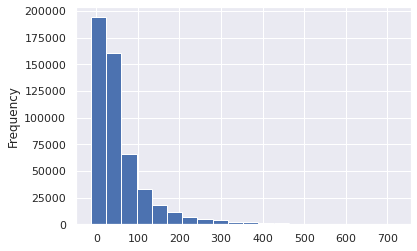

In [16]:
df_copy2 = df_copy2[df_copy2.diff_price == 0].drop_duplicates(subset=['stock_id'])
df_copy2['keisai_day'] = df_copy2['end_day']-df_copy2['start_day']
df_copy2['keisai_day'] = df_copy2.keisai_day.astype('timedelta64[D]').astype(int)
df_copy2['keisai_day'].plot.hist(bins=20)

In [17]:
df_copy2.keisai_day.median(), df_copy2.keisai_day.mean()

(34.0, 58.164040981615926)

#### データ：以下は値下げしているもののデータ

In [ ]:
#値下げ回数をｓりたい
#値下げ車種の具体例時系列推移
#一ヶ月２ヶ月・・・・での価格推移

In [ ]:
str_price = [str(price) for price in df.diff_price.value_counts().index.tolist()]

In [ ]:
price_cols = [price[:-4]+' man'for price in str_price]

In [ ]:
len(price_cols)

In [ ]:
ex = df.diff_price.value_counts()

In [ ]:
ex.index = price_cols

In [ ]:
ex.head(10).plot.bar(figsize=(7 ,4))
plt.xticks(rotation=45)
plt.show()